In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load Data

In [2]:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\botcamp\Trabajo final\vehiculos-de-segunda-mano-sample.csv')

In [3]:
df.head(1)

,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,NaN,manual,...,Sergio Y.,NaN,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,Pineda de Mar,ES,True,www.cocheauto.com,2017-01-18,2023-02-06


## Duplicados

In [4]:
# Eliminamos duplicados 
df = df.drop_duplicates()

In [5]:
print(df.shape)

(99763, 28)


In [6]:
#Mostrar nombres de cada columna en una lista
print(df.columns)


Index(['vehicle_type', 'make', 'model', 'version', 'fuel', 'year', 'kms',
       'power', 'doors', 'shift', 'color', 'photos', 'description', 'price',
       'currency', 'location', 'publish_date', 'update_date', 'dealer_name',
       'dealer_description', 'dealer_address', 'dealer_zip_code',
       'dealer_city', 'dealer_country_code', 'dealer_is_professional',
       'dealer_website', 'dealer_registered_at', 'date'],
      dtype='object')


Drop columns

In [7]:
#Drop 'vehicle_type','doors','color','photos', 'description','currency','update_date','dealer_description','dealer_address', 'dealer_zip_code','dealer_is_professional','dealer_city', 'dealer_country_code','dealer_website','dealer_registered_at', 'date'
df = df.drop(['dealer_name','vehicle_type','doors','color','photos', 'description','currency','update_date','dealer_description','dealer_address','dealer_is_professional','dealer_city', 'dealer_country_code','dealer_website','dealer_registered_at', 'date'], axis=1)

## Nulls

In [8]:
#Mostramos los nulos en porcetaje con relacion al total por cada fila 
df.isnull().sum()/df.shape[0]*100

make               0.000000
model              0.000000
version            0.158375
fuel               3.184547
year               0.000000
kms                0.810922
power              0.283672
shift              1.020418
price              0.000000
location           0.000000
publish_date       0.000000
dealer_zip_code    0.092219
dtype: float64

### Drop nulls from version and kms

In [9]:
#Drop nuls de "verion", kms, power,dealer_name
df = df.dropna(subset=['version', 'kms'])

### Fixing Fuel, Power and Shift

In [10]:
#Lista de variables a rellenar
variables = ['fuel', 'power', 'shift']
 
# Función para calcular la moda o mediana por modelo
def calculate_stat_by_model(df, var):
    if var == 'power':
        return df.groupby('model')[var].transform(lambda x: x.median() if not pd.isna(x.median()) else None)
    else:
        return df.groupby('model')[var].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
 
# Función para rellenar los valores nulos
def fill_missing_values(df, var):
    stat_by_model = calculate_stat_by_model(df, var)
    df[var] = df[var].fillna(stat_by_model)
    return df
 
# Aplicar la función para cada variable
for var in variables:
    df = fill_missing_values(df, var)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
 
# Mostrar el resultado completo para 'shift'
shift_nulls = df[df['shift'].isnull()][['make', 'model']].value_counts()
print("Shift Nulls:")
print(shift_nulls)

# Mostrar el resultado completo para 'power'
power_nulls = df[df['power'].isnull()][['make', 'model']].value_counts()
print("\nPower Nulls:")
print(power_nulls)

# Mostrar el resultado completo para 'fuel'
fuel_nulls = df[df['fuel'].isnull()][['make', 'model']].value_counts()
print("\nFuel Nulls:")
print(fuel_nulls)

Shift Nulls:
make   model 
Lotus  Esprit    7
Name: count, dtype: int64

Power Nulls:
make     model  
Citroen  ë-Jumpy    8
Name: count, dtype: int64

Fuel Nulls:
make     model    
Ferrari  LaFerrari    8
Lotus    Esprit       7
Tata     Indigo       6
Name: count, dtype: int64


In [12]:
#Rellenamos citroen e-jumpy con 100
df.loc[(df['make'] == 'Citroen') & (df['model'] == 'ë-Jumpy'), 'power'] = 100

In [13]:
#Rellenamos Lotus Esprit con manual
df.loc[(df['make'] == 'Lotus') & (df['model'] == 'Esprit'), 'shift'] = "manual"

In [14]:
modelos = "LaFerrari","Indigo","Esprit"
df.loc[df['model'].isin(modelos), 'fuel'] = 'Gasolina'

# Zip code

In [15]:
#Mostramos la cantidad de filas donde dealer_zip_code es nulo
print(df['dealer_zip_code'].isnull().sum())

92


In [16]:
#Drop dealer_zip_code nulls
df = df.dropna(subset=['dealer_zip_code'])

In [17]:
# df[df['dealer_zip_code']=='Parque Empresarial San Fernando de Henares'].fillna('28830')
# df[df['dealer_zip_code']=='Collado Villalba'].fillna('28400')
# df[df['dealer_zip_code']=='Elx/Elche'].fillna('03203')

# Dtypes

In [18]:
df.dtypes

make                object
model               object
version             object
fuel                object
year                 int64
kms                float64
power              float64
shift               object
price                int64
location            object
publish_date        object
dealer_zip_code    float64
dtype: object

In [19]:
#Publish date to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Getting location latitud and longitude

### Análisis de correlación de las variables númericas

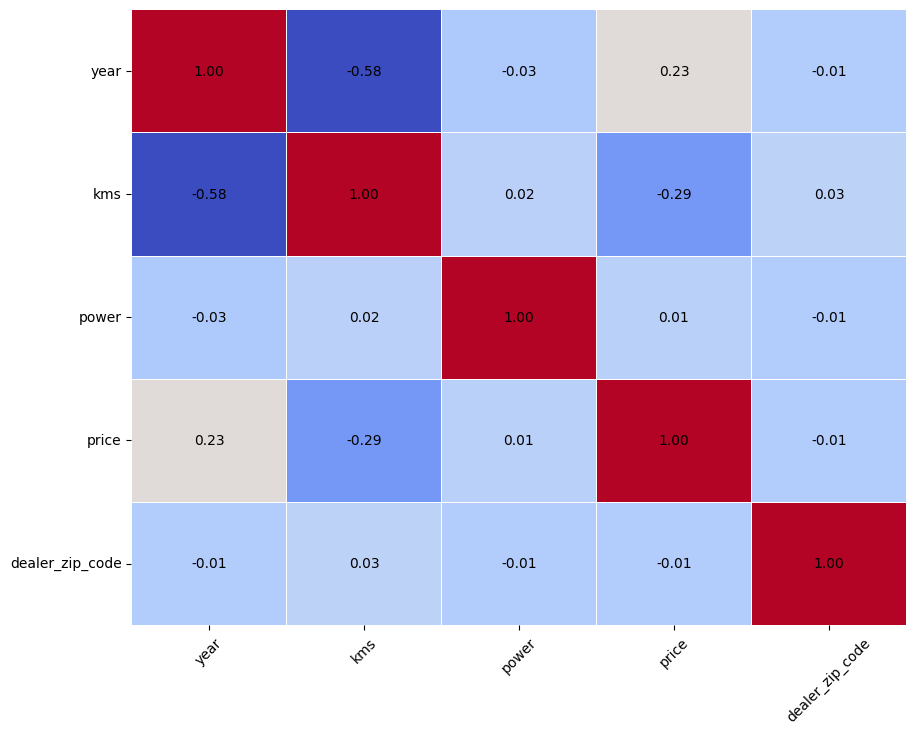

In [22]:
# Seleccionar solo las columnas numéricas
df_num = df.select_dtypes(include=['number'])
 
# Calcular la matriz de correlación
df_cor = df_num.corr(method='pearson')
 
# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_cor, annot=True, fmt=".2f", cmap='coolwarm', cbar=False,
            annot_kws={"color": "black"}, linewidths=.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Como se puede observar en la matriz, las variables independientes entre si no exceden el 0.7 de correlación por tanto no se muestran problemas en este sentido.

### Análisis exploratorio de los datos (EDA)

Top 10 de los anuncios ofertados según el modelo de los coches

In [23]:
# Contar la cantidad de anuncios por modelo
model_counts = df['model'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
model_counts.columns = ['model', 'count']

# Mostrar el top 10 de modelos con más anuncios
top_10_models = model_counts.head(10)

print(top_10_models)

        model  count
0          C3   3993
1    Berlingo   3755
2  C4 Picasso   1701
3    Talisman   1600
4    C-Élysée   1110
5         500   1106
6    Sportage    969
7      Carens    828
8        Leon    670
9        C-HR    670


Top 10 de las marcas más anunciadas

In [24]:
# Contar la cantidad de anuncios por marca
make_counts = df['make'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
make_counts.columns = ['make', 'count']

# Mostrar el top 10 de marcas con más anuncios
top_10_makes = make_counts.head(10)

print(top_10_makes)

         make  count
0     Citroen  16306
1  Volkswagen   5550
2        Audi   5303
3     Renault   5273
4        Ford   4848
5     Peugeot   4845
6         KIA   4695
7        Opel   4541
8     Hyundai   3648
9         BMW   3482


Gráfico de barras del top 10 de la marca y modelo de los coches más anunciados

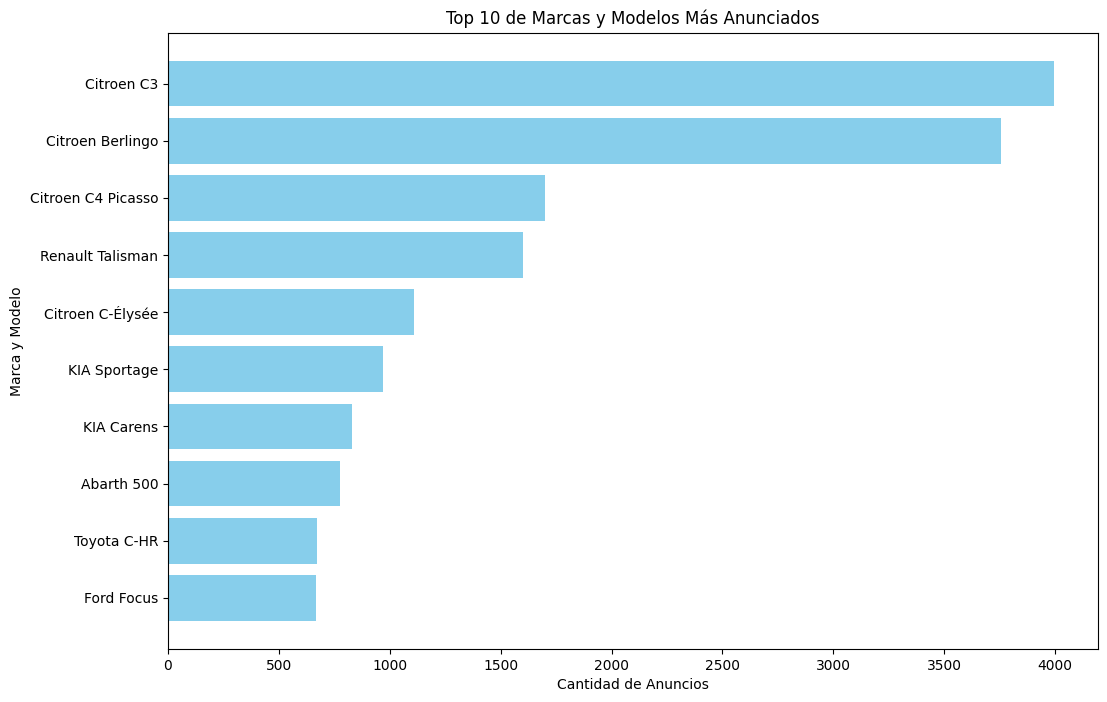

In [26]:
# Crear una nueva columna combinada 'make_model'
df['make_model'] = df['make'] + ' ' + df['model']

# Contar la cantidad de anuncios por marca y modelo
make_model_counts = df['make_model'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
make_model_counts.columns = ['make_model', 'count']

# Obtener el top 10 de marcas y modelos con más anuncios
top_10_make_models = make_model_counts.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(top_10_make_models['make_model'], top_10_make_models['count'], color='skyblue')
plt.xlabel('Cantidad de Anuncios')
plt.ylabel('Marca y Modelo')
plt.title('Top 10 de Marcas y Modelos Más Anunciados')
plt.gca().invert_yaxis()  # Invertir el eje y para que el top 10 aparezca en la parte superior
plt.show()

Gráfico comparativo del precio promedio de los coches según el tipo de combustible

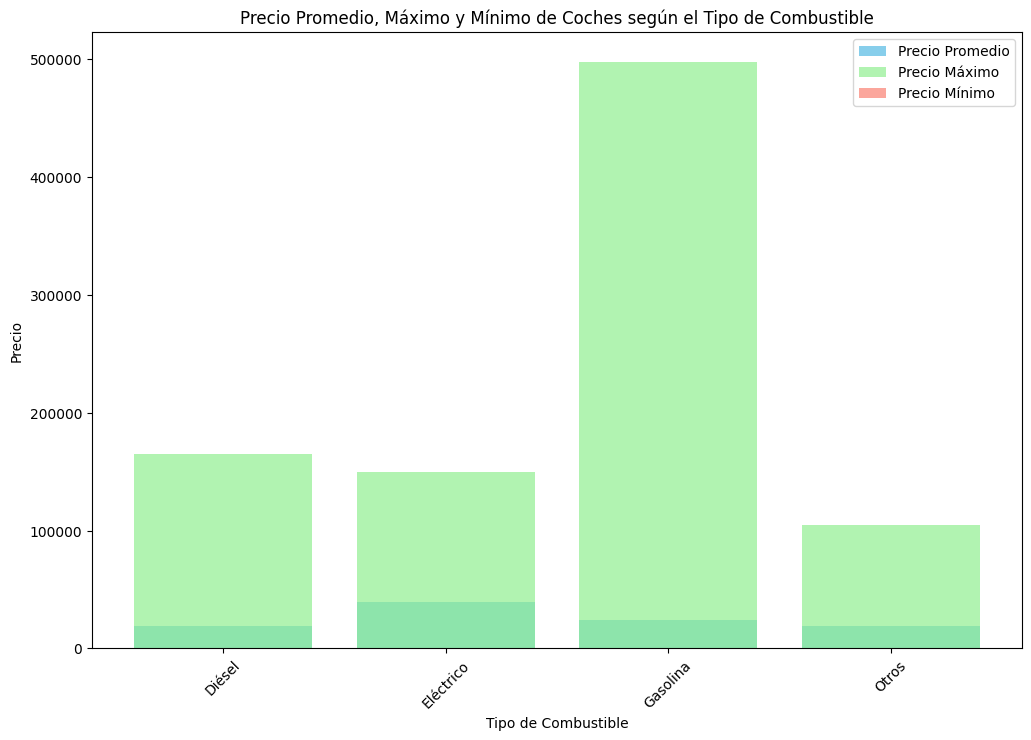

In [32]:
# Calcular el precio promedio, máximo y mínimo según el tipo de combustible
price_stats_by_fuel = df.groupby('fuel')['price'].agg(['mean', 'max', 'min']).reset_index()

# Renombrar las columnas para mayor claridad
price_stats_by_fuel.columns = ['fuel', 'average_price', 'max_price', 'min_price']

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))

# Crear barras para el precio promedio
ax.bar(price_stats_by_fuel['fuel'], price_stats_by_fuel['average_price'], label='Precio Promedio', color='skyblue')

# Crear barras para el precio máximo
ax.bar(price_stats_by_fuel['fuel'], price_stats_by_fuel['max_price'], label='Precio Máximo', color='lightgreen', alpha=0.7)

# Crear barras para el precio mínimo
ax.bar(price_stats_by_fuel['fuel'], price_stats_by_fuel['min_price'], label='Precio Mínimo', color='salmon', alpha=0.7)

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Combustible')
ax.set_ylabel('Precio')
ax.set_title('Precio Promedio, Máximo y Mínimo de Coches según el Tipo de Combustible')
ax.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Treemap de las marcas anunciadas

In [ ]:
# Contar la cantidad de coches por marca
make_counts = df['make'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
make_counts.columns = ['make', 'count']

# Crear el treemap
fig = px.treemap(make_counts, path=['make'], values='count', 
                 title='Cantidad de Coches por Marca',
                 color='count', color_continuous_scale='Blues')

# Mostrar el gráfico
fig.show()

Gráfico lineal de los coches anunciados por año de fabricación

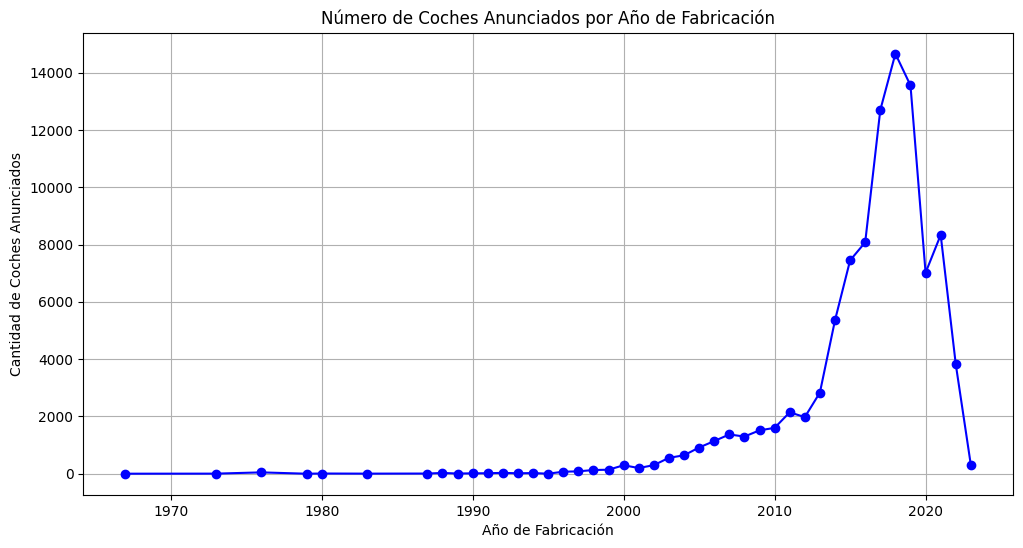

In [36]:
# Contar la cantidad de coches por año de fabricación
year_counts = df['year'].value_counts().sort_index().reset_index()

# Renombrar las columnas para mayor claridad
year_counts.columns = ['year', 'count']

# Crear el gráfico lineal
plt.figure(figsize=(12, 6))
plt.plot(year_counts['year'], year_counts['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Año de Fabricación')
plt.ylabel('Cantidad de Coches Anunciados')
plt.title('Número de Coches Anunciados por Año de Fabricación')
plt.grid(True)
plt.show()

Gráfico circular según el tipo de cambio

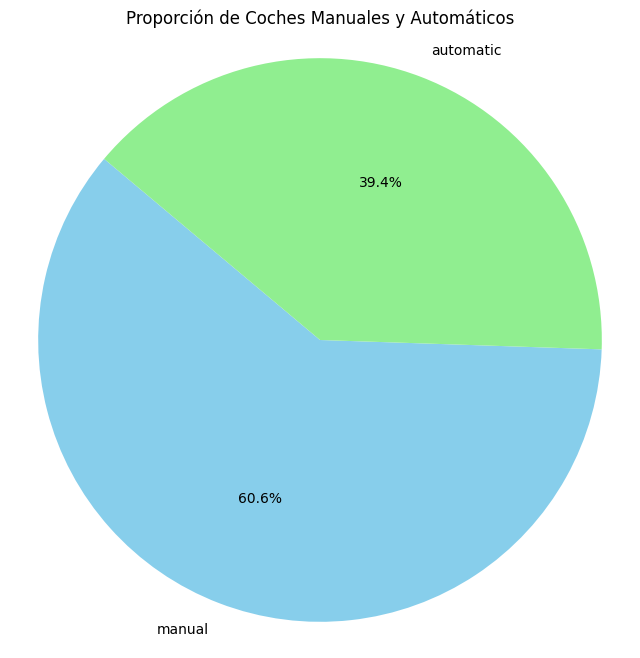

In [40]:
# Contar la cantidad de coches por tipo de transmisión
shift_counts = df['shift'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
shift_counts.columns = ['shift', 'count']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(shift_counts['count'], labels=shift_counts['shift'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Proporción de Coches Manuales y Automáticos')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()